## Preproccesing Data (Extracting Data)
### Meteorite Data

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read Meteorite data and sort them by yeras
df_meteorite = pd.read_csv("Meteorite_Landings.csv").sort_values(by=['year'])

# drop rows with NAN value
df_meteorite = df_meteorite.dropna()

# drop unnecessary columns
##### GeoLocation - reclat and reclong exsits
##### nametype & id - not needed
df_meteorite = df_meteorite.drop(columns={'GeoLocation', 'nametype', 'id'})

# Change the format of date MM/DD/YYYY to YYYY
df_meteorite['year'] = df_meteorite['year'].str.slice(6, 10)

print("Number of observations: " + str(df_meteorite.shape[0]))
df_meteorite.head()

Number of observations: 38116


,name,recclass,mass (g),fall,year,reclat,reclong
174,Castrovillari,Stone-uncl,15000.0,Fell,1583,39.80000,16.20000
26166,Morito,"Iron, IIIAB",10100000.0,Found,1600,27.05000,-105.43333
410,Jalandhar,Iron,1967.0,Fell,1621,31.00000,75.00000
956,Stretchleigh,Stone-uncl,10400.0,Fell,1623,50.38333,-3.95000
369,Hatford,Stone-uncl,29000.0,Fell,1628,51.65000,-1.51667


<hr />

### Natural Disaster Data


In [85]:
# Read Natural Disaster data
# ND = Natural Disaster
df_ndisaster = pd.read_csv("natural_disaster.csv")
df_ndisaster.shape

(48390, 16)

In [86]:
# Create new dateframe with only necessary columns
df_ndisaster = pd.DataFrame({'Year':df_ndisaster['Incident Begin Date'],
                   'Incident Type':df_ndisaster['Incident Type'], 
                   'Title':df_ndisaster['Title'],
                   'Declared County':df_ndisaster['Declared County/Area']})

df_ndisaster['Year'] = (pd.to_datetime(df_ndisaster['Year'])).dt.year
# drop any row with NAN value
df_ndisaster = df_ndisaster.dropna()

print("Number of observations: " + str(df_ndisaster.shape[0]))

df_ndisaster.head()

Number of observations: 48193


,Year,Incident Type,Title,Declared County
0,2018,Fire,WILDFIRES,Butte (County)
1,2018,Fire,WILDFIRES,Los Angeles (County)
2,2018,Fire,WILDFIRES,Ventura (County)
3,2018,Fire,WILDFIRES,Butte (County)
4,2018,Fire,WILDFIRES,Los Angeles (County)


### <hr />

## Observing Data

### Observe number of natural disasters occured each year (1959 ~ 2012)

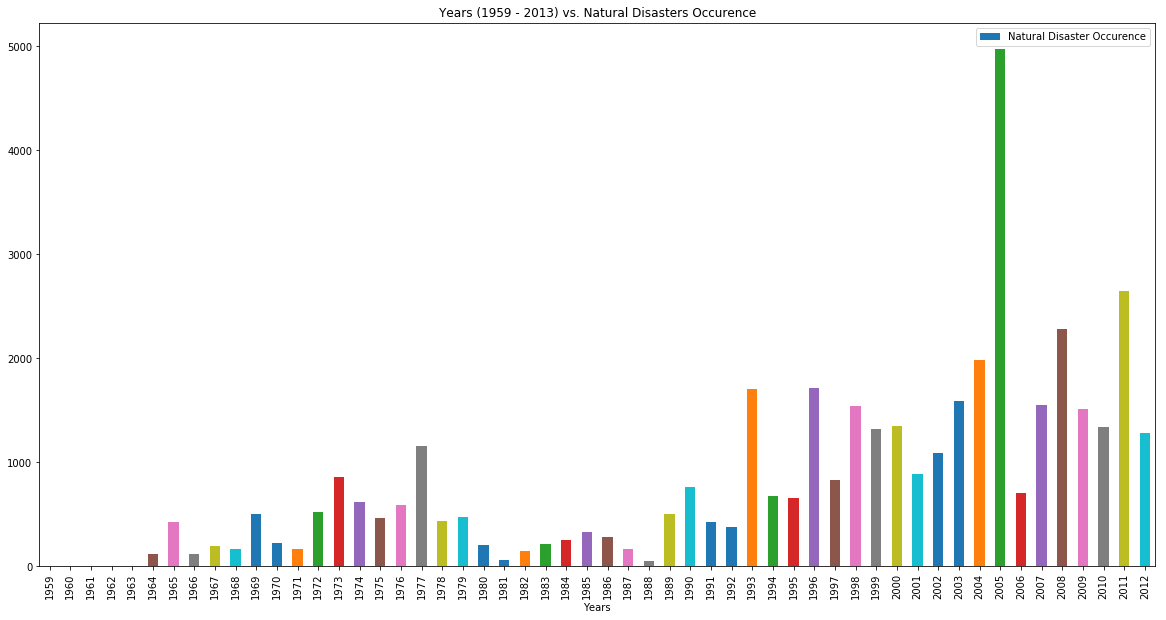

In [87]:
# Sort natural disaster data frame by type of disasters
df_ndisaster = df_ndisaster.sort_values(by=['Year'])

# Count number of disasters occured per year
years = df_ndisaster['Year'].values

minYear = years[0]
maxYear = 2012
years_freq_nd = [0] * (maxYear - minYear + 1)

for x in years:
    if(x>maxYear):
        break
    years_freq_nd[x-minYear] = years_freq_nd[x-minYear] + 1

# 1960, 61, 62,, and 63 doesn't exist in original, 
# so i'm going to create new datafram with these years included
years = []
{years.append(x) for x in range(minYear, maxYear+1)}

df_years_vs_nd = pd.DataFrame({'Years':years, 'Natural Disaster Occurence':years_freq_nd})
df_years_vs_nd.plot(x='Years', y='Natural Disaster Occurence', kind='bar', figsize=(20,10),
             title="Years (1959 - 2013) vs. Natural Disasters Occurence")

> The above graph shows the year 2005 had far more number of natural disasters compare to any other yeras. [Was 2005 the year of natural disasters?](http://www.who.int/bulletin/volumes/84/1/news10106/en/)

<hr />

### Observe number of meteorite impacts occured each year (1959 ~ 2012)

[Meteorites, Impcats, and Mass Extinction](http://www.tulane.edu/~sanelson/Natural_Disasters/impacts.htm)

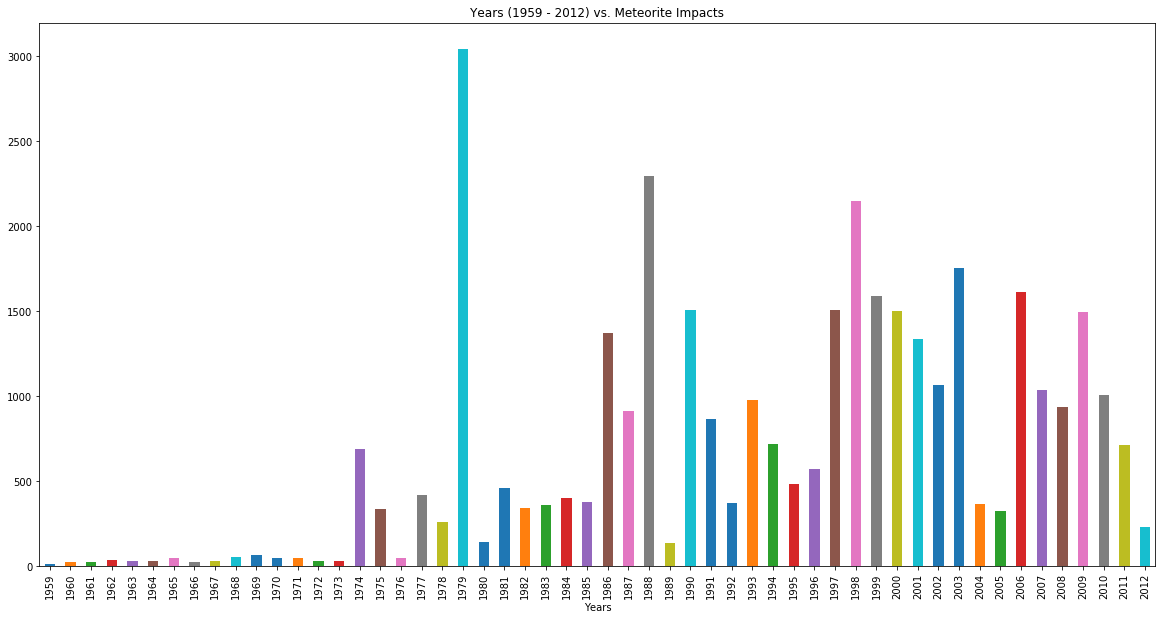

In [88]:
years_freq_meteo = [0] * (maxYear - minYear + 1)

for x in (pd.DataFrame({'Year':df_meteorite['year']})).values:
    if int(x) >= minYear and int(x) <= maxYear:
        years_freq_meteo[int(x)-minYear] = years_freq_meteo[int(x)-minYear] + 1

df_years_vs_meteo = pd.DataFrame({'Years':years, 'Num. of Meteorite Impacts':years_freq_meteo})
df_years_vs_meteo.plot(x='Years', y='Num. of Meteorite Impacts', kind='bar', figsize=(20,10),
             title="Years (1959 - 2012) vs. Meteorite Impacts", legend=False)

## Plot NDO and MIO side by side

NDO : Natural Disaster Occurence

MIO : Meteroite Impact Occurence

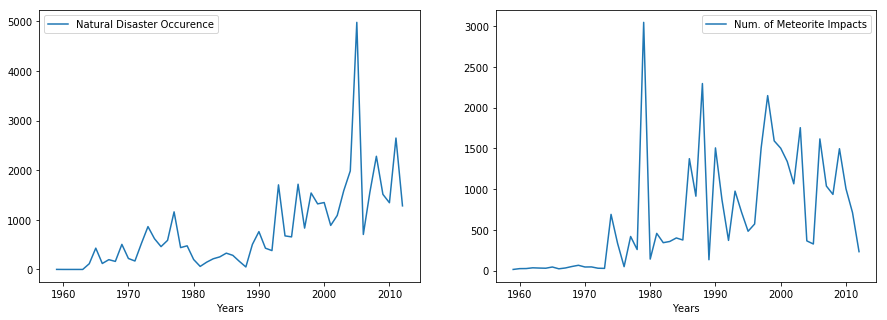

In [89]:
fig, axs = plt.subplots(1,2)

df_years_vs_nd.plot(ax=axs[0], x='Years', y='Natural Disaster Occurence', kind='line', figsize=(15, 5))
df_years_vs_meteo.plot(ax=axs[1], x='Years', y='Num. of Meteorite Impacts', kind='line', figsize=(15, 5))

# Geographic Plot

In [90]:
ndo = df_years_vs_nd[(df_years_vs_nd['Years'][:] >= 1959) & (df_years_vs_nd['Years'][:] <= 2013)]
# plt.loglog(df_years_vs_nd['Years'], ndo['Natural Disaster Occurence'], '.')

In [91]:
# type cast string year to int
df_meteorite['year'] = df_meteorite['year'].apply(lambda x: int(x))

# grab coulmns whose years are btwn 1959 and 2013
df_m = df_meteorite[(df_meteorite['year'][:] >= 1959) & (df_meteorite['year'][:] <= 2013)]

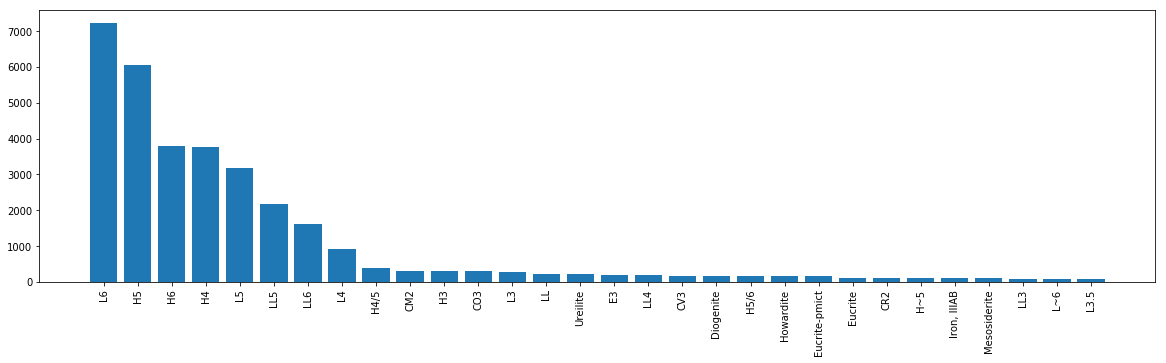

In [92]:
# plot meteorite classification
plt.figure(figsize=(20,5))
plt.bar(df_m['recclass'].value_counts().index[0:30], df_m['recclass'].value_counts().values[0:30])
_ = plt.xticks(rotation=90)

In [93]:
# remove reclong/reclat with value == 0
df_m = df_m[df_m['reclong'] != 0]
df_m = df_m[df_m['reclat'] != 0]

# eyeball - splice region - USA
df_m = df_m[(df_m['reclong']<=-50) & (df_m['reclat']>=13)]


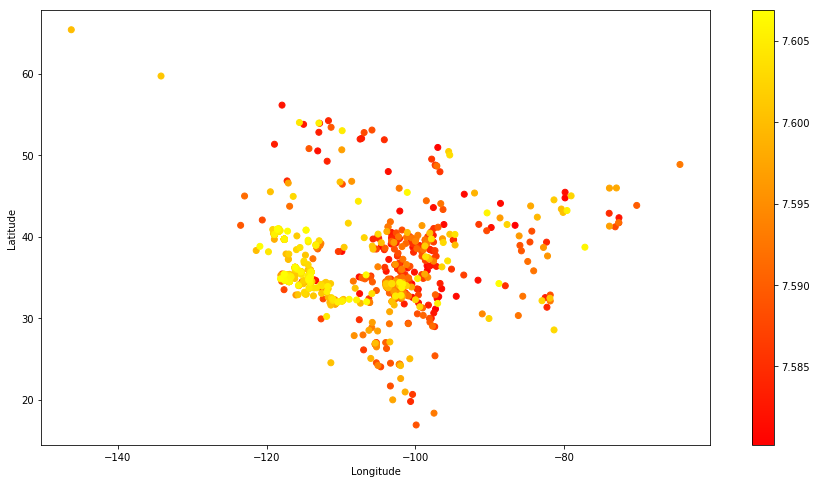

In [94]:
ndo = ndo.rename(columns={'Years': 'year'})

color_yr = [np.log(year) for year in df_m['year']]

plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_yr, cmap=plt.cm.autumn)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [95]:
# color_mass = [np.log(mass) for mass in df_m['mass (g)']]

color_mass = []

for mass in df_m['mass (g)']:
    if mass == 0:
        color_mass.append(np.log(1))
    elif mass != 0:
        color_mass.append(np.log(mass))

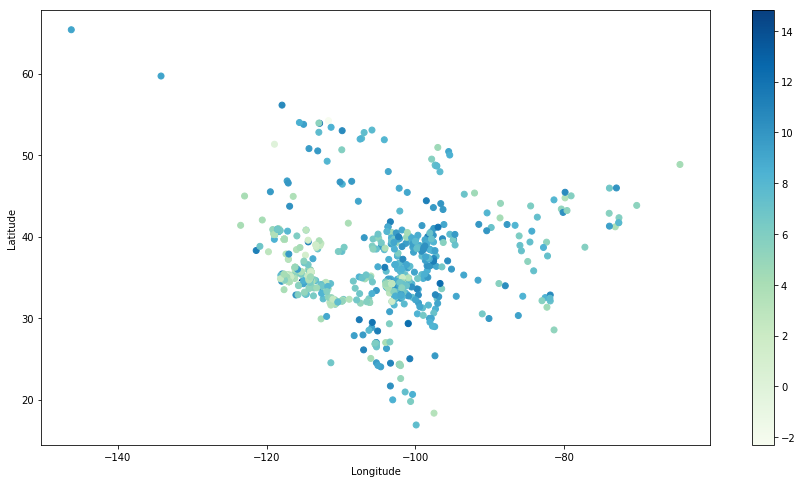

In [96]:
plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_mass, cmap=plt.cm.GnBu)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Finalized DataFrame

In [97]:
df_final = pd.DataFrame({
        'years':df_years_vs_nd['Years'],
        'ndo':df_years_vs_nd['Natural Disaster Occurence'],
        'mio':df_years_vs_meteo['Num. of Meteorite Impacts']})

avg_mass = []
max_mass = []
class_name = []
max_count = []

years = range(1959, 2013)
for year in years:
    avg_mass.append(np.mean(df_m['mass (g)'][df_m['year']==year].values))
    max_mass.append(max(df_m['mass (g)'][df_m['year']==year].values))
    max_count.append(df_m.recclass[df_m['year']==year].value_counts()[0])
    class_name.append(df_m.recclass[df_m['year']==year].value_counts().index[0])
    
df_final['class_name'] = pd.DataFrame({'class_name':class_name})
df_final['max_count'] = pd.DataFrame({'max_count':max_count})
df_final['avg_mass'] = pd.DataFrame({'avg_mass':avg_mass})
df_final['max_mass'] = pd.DataFrame({'max_mass':max_mass})

df_final.head()

df_final = df_final[:-1]
# years      -> years 1959~2013
# ndo        -> natural disaster occurence
# mio        -> meteorite impact occurence 
# class_name -> classified name of meteorite with most occurence in that year
# max_count  -> above meteorite's max occurence number
# avg_mass   -> average meteorite mass in that year
# max_mass   -> largest meteorite fell in that year

## Data Simulation

### Fit a Simple Linear Regression: NDO vs. MIO

const    0.000938
mio      0.087315
dtype: float64


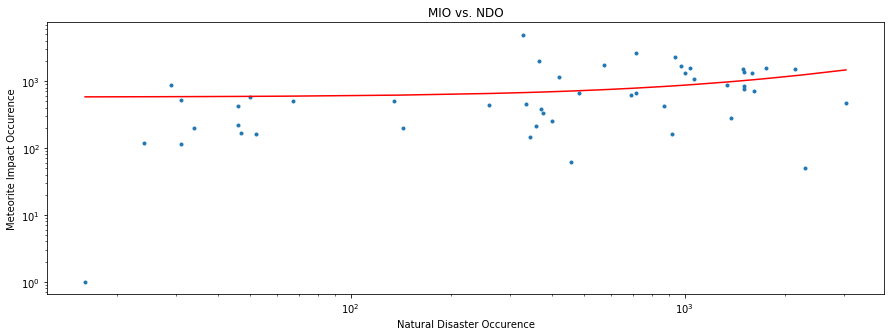

In [98]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

def graph(x, y):
    plt.figure(figsize=(15,5))
    plt.loglog(df_final[x], df_final[y], '.')
    return (df_final[x], df_final[y])
    
# scatter plot ndo vs mio
x, y = graph('mio', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('Meteorite Impact Occurence')
plt.title('MIO vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') #add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Count

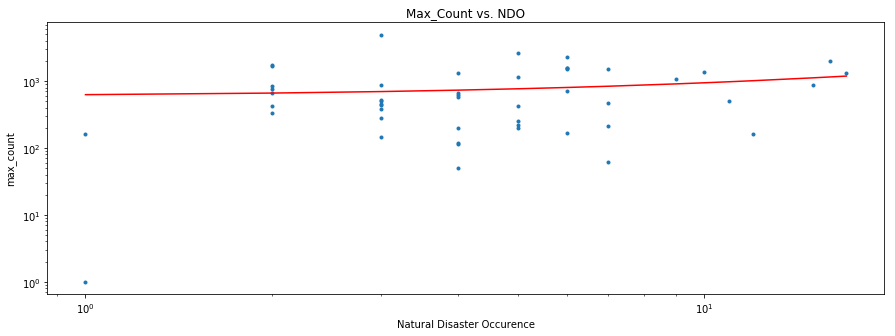

In [99]:
# scatter plot ndo vs max_count
x,y = graph('max_count', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('max_count')
plt.title('Max_Count vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

# print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Avg_Mass

const       5.312042e-08
avg_mass    1.970893e-01
dtype: float64


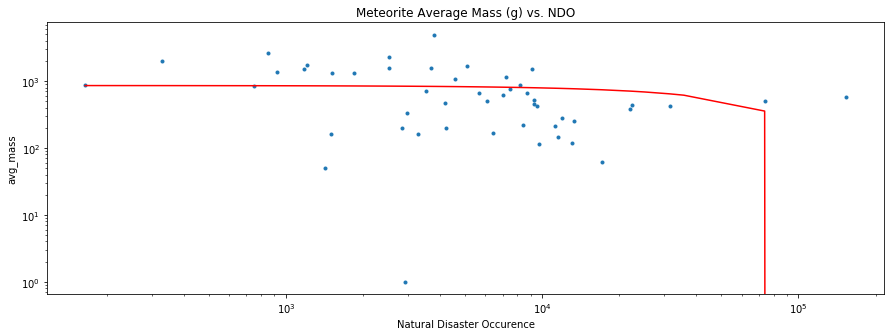

In [100]:
# scatter plot ndo vs avg_mass
x,y = graph('avg_mass', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('avg_mass')
plt.title('Meteorite Average Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Mass

const       5.928631e-08
max_mass    4.615223e-01
dtype: float64


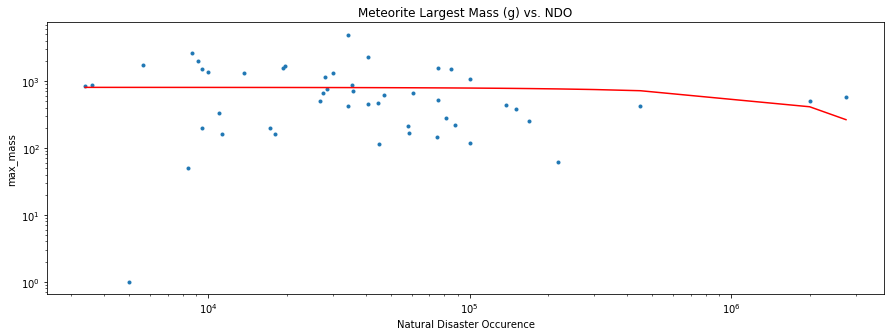

In [101]:
# scatter plot ndo vs max_mass
x,y = graph('max_mass', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('max_mass')
plt.title('Meteorite Largest Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

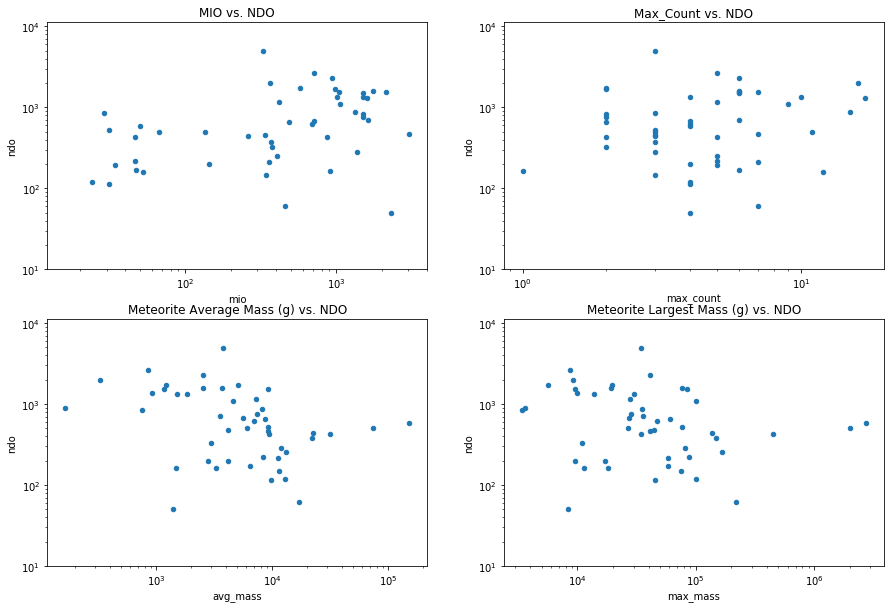

In [102]:
fig, axs = plt.subplots(2,2)

df_final.plot(ax=axs[0][0], x='mio', y='ndo', ylim=10e0, kind='scatter', title='MIO vs. NDO', figsize=(15,10), loglog=True)
df_final.plot(ax=axs[0][1], x='max_count',y='ndo', ylim=10e0, kind='scatter', title='Max_Count vs. NDO', loglog=True)
df_final.plot(ax=axs[1][0], x='avg_mass', y='ndo', ylim=10e0, kind='scatter', title='Meteorite Average Mass (g) vs. NDO', loglog=True)
df_final.plot(ax=axs[1][1], x='max_mass', y='ndo', ylim=10e0, kind='scatter', title='Meteorite Largest Mass (g) vs. NDO', loglog=True)


## Multiple Linear Regression

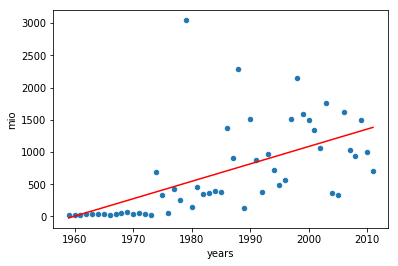

In [103]:
df_final.plot('years', 'mio', kind='scatter')
fit = np.polyfit(df_final['years'], df_final['mio'], deg=1)
# plot_x = x.sort_values(ascending=True)
plt.plot(df_final['years'], fit[0]*df_final['years'] + fit[1], color='red') # add reg line

plt.show()

In [104]:
# multi regression summary
fit = ols('ndo ~ years + mio', data = df_final).fit()
fit.params

Intercept   -92929.618117
years           47.317105
mio             -0.320108
dtype: float64

In [105]:
# multi regression summary
fit = ols('ndo ~ years', data = df_final).fit()
fit.params

Intercept   -75976.220126
years           38.666667
dtype: float64

In [106]:
# multi regression summary
fit = ols('y ~ 1 + mio + max_count:class_name ', data = df_final).fit()
fit.f_pvalue

0.362459132033779

In [107]:
df_final.columns

Index(['years', 'ndo', 'mio', 'class_name', 'max_count', 'avg_mass',
       'max_mass'],
      dtype='object')

In [108]:
# multi regression summary
fit = ols('ndo ~ 1 + mio + avg_mass + years', data = df_final).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     17.05
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.02e-07
Time:                        20:27:31   Log-Likelihood:                -414.69
No. Observations:                  53   AIC:                             837.4
Df Residuals:                      49   BIC:                             845.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.312e+04   1.41e+04     -6.601      0.000   -1.21e+05   -6.48e+04
mio           -0.3185      0.155     -2.052      0.046      -0.630      -0.007
avg_mass       0.0003      0.004      0.072      0.943      -0.008       0.008
years         47.4105      7.131      6.648      0.000      33.080      61.741
==============================================================================
Omnibus:                       52.656   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.539
Skew:                           2.506   Prob(JB):                     3.74e-73
Kurtosis:                      14.221   Cond. No.                     4.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cross Validation

In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.utils import shuffle
df_cv = shuffle(df_final)
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, df_cv['ndo'], df_cv['years'], cv=3)

ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [181]:
np.unique(df_final['class_name'])

array(['H4', 'H5', 'H6', 'L4', 'L5', 'L6', 'OC'], dtype=object)

In [192]:
df_final

,years,ndo,mio,class_name,max_count,avg_mass,max_mass
0,1959,1,16,H5,1.0,2908.000000,5000.0
1,1960,0,26,H5,2.0,35706.130000,303000.0
2,1961,0,27,H5,5.0,25137.987500,283000.0
3,1962,0,36,H5,5.0,17002.676471,74600.0
4,1963,0,33,L6,7.0,13510.408696,132700.0
5,1964,115,31,OC,4.0,9739.538462,45000.0
6,1965,429,46,L6,5.0,31430.455556,450000.0
7,1966,120,24,L4,4.0,13064.250000,100000.0
8,1967,197,34,H4,5.0,2826.760000,9500.0
9,1968,162,52,H5,12.0,1500.670588,11310.0
